In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.head()
data.size

9366

In [7]:
data = data.dropna()
data = data.drop_duplicates()
data.size

9359

In [22]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


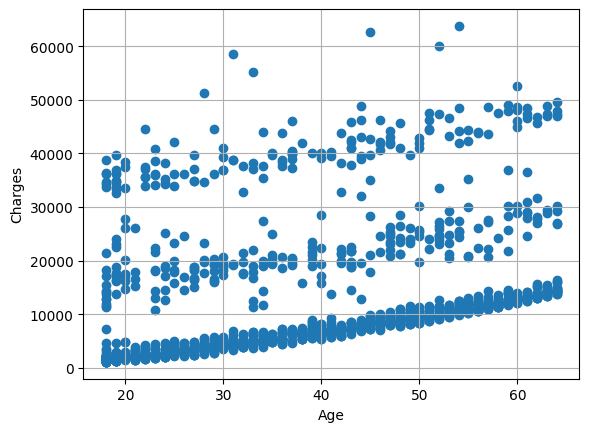

In [13]:
plt.scatter(data['age'],data['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

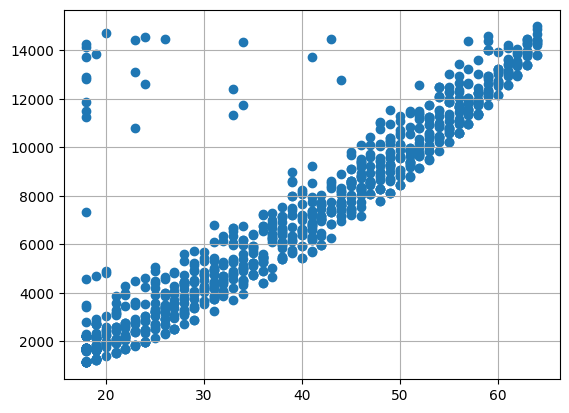

In [3]:
data1 = data[data['charges']<= 15000]
plt.scatter(data1['age'],data1["charges"])
plt.grid(True)
plt.show()

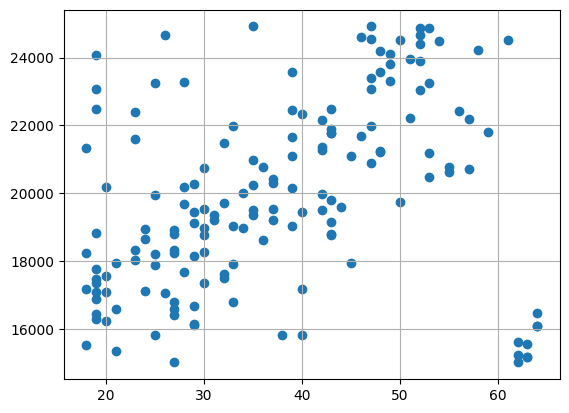

In [6]:
data2 = data[(data['charges'] >= 15000) & (data['charges'] <= 25000)]
plt.scatter(data2['age'], data2["charges"])
plt.grid(True)
plt.show()


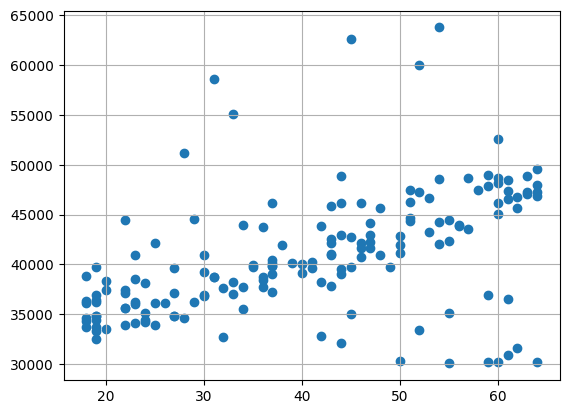

In [7]:
data3 = data[(data['charges'] >= 30000) ]
plt.scatter(data3['age'], data3["charges"])
plt.grid(True)
plt.show()


Mean Squared Error: 2963353.1121352375
R^2 Score: 0.7997037446535662


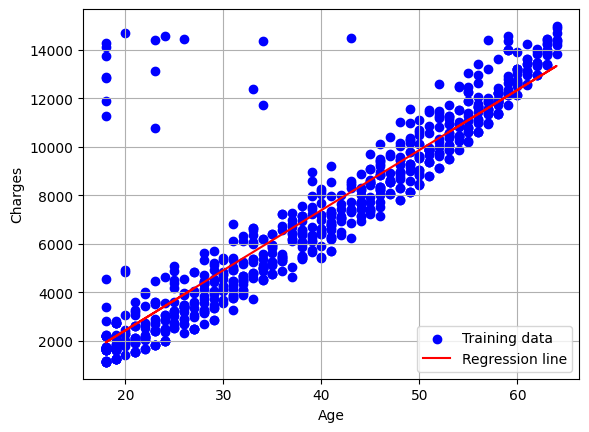

In [4]:
X = data1[['age']]  # Reshape to 2D as expected by sklearn (for one feature)
y = data1['charges']

# Split the data into training and testing sets (optional, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the regression line on training data for plotting
line = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the scatter plot with regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, line, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 4589424.536339666
R^2 Score: 0.16759494961500399


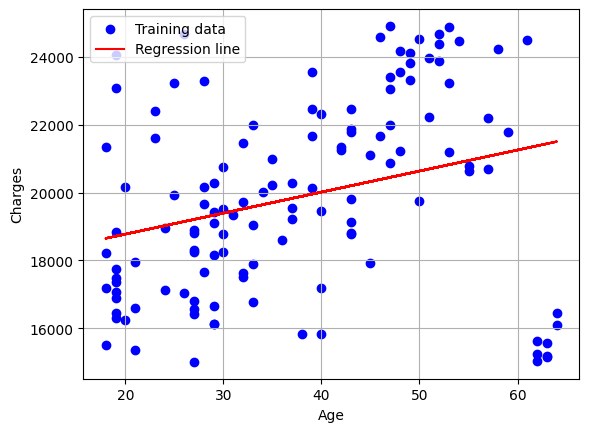

In [8]:
X = data2[['age']]  # Reshape to 2D as expected by sklearn (for one feature)
y = data2['charges']

# Split the data into training and testing sets (optional, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the regression line on training data for plotting
line = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the scatter plot with regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, line, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 33622038.546157554
R^2 Score: -0.08444403659140565


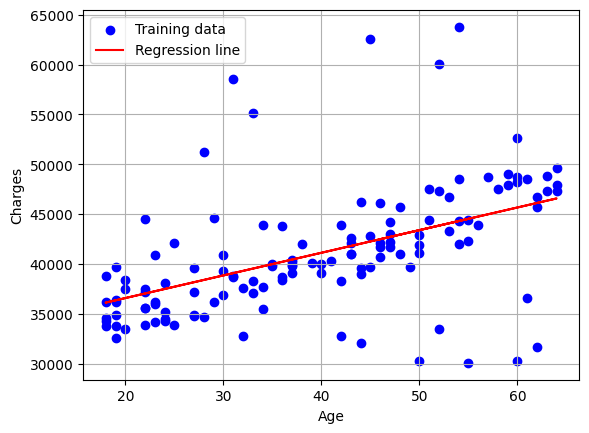

In [9]:
X = data3[['age']]  # Reshape to 2D as expected by sklearn (for one feature)
y = data3['charges']

# Split the data into training and testing sets (optional, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the regression line on training data for plotting
line = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the scatter plot with regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, line, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 34512843.88022789
R^2 Score: 0.7776932310583375


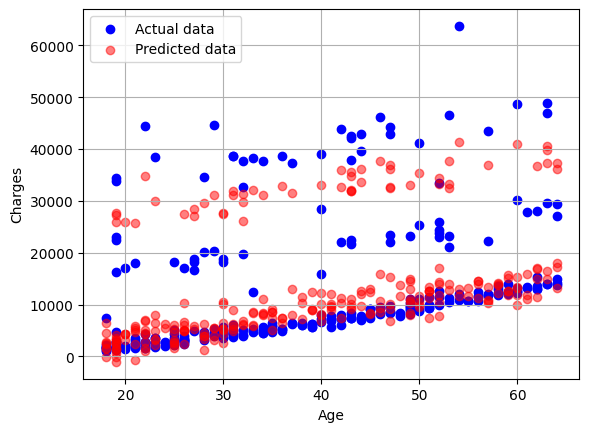

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
X = data[['age', 'bmi', 'smoker']]  
y = data['charges']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 131440262.76073726
R^2 Score: 0.1533569292467798


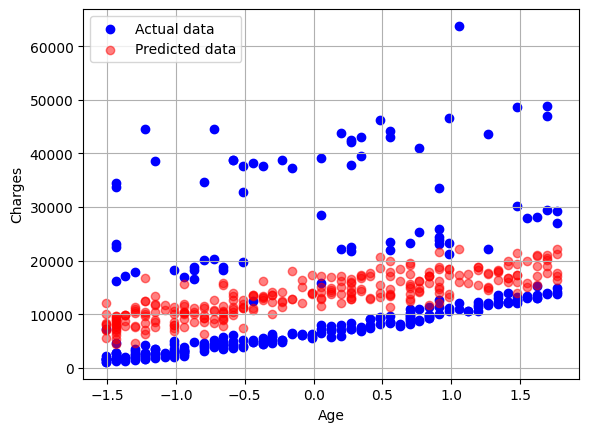

In [13]:
from sklearn.preprocessing import StandardScaler

# Convert 'smoker' to binary values (if not already done)
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Select the features to be scaled
features = ['age', 'bmi', 'smoker']

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform Z-scaling (standardization) on the selected features
data[features] = scaler.fit_transform(data[features])

# Now proceed with the rest of the linear regression model
X = data[features]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from scipy import stats

# Assuming 'age', 'bmi', and 'charges' are the columns of interest
z_scores = np.abs(stats.zscore(data[['age', 'bmi', 'charges']]))

# Set a threshold for Z-score (commonly 3)
threshold = 3

# Filter the data to remove outliers (those with Z-scores above the threshold)
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Check the shape of the new dataset
print(data_no_outliers.shape)
X = data_no_outliers[['age', 'bmi', 'smoker']]
y = data_no_outliers['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


(1327, 7)
Mean Squared Error: 131035189.62523605
R^2 Score: 0.07884801075769032


Mean Squared Error: 131440262.76073726
R^2 Score: 0.1533569292467798


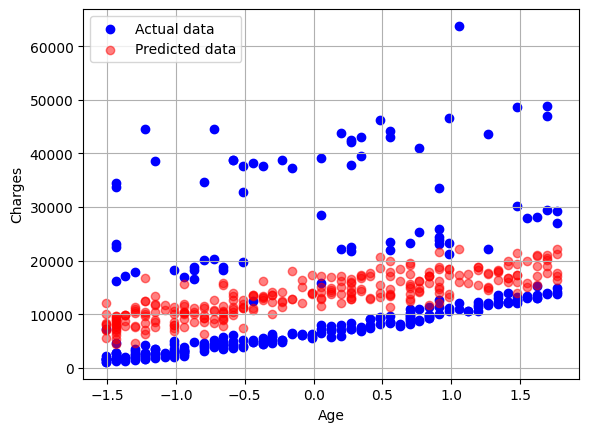

In [15]:
X = data[['age', 'bmi']]
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting age vs charges with predicted charges
plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 2974740.6406598515
R^2 Score: 0.7989340492325951


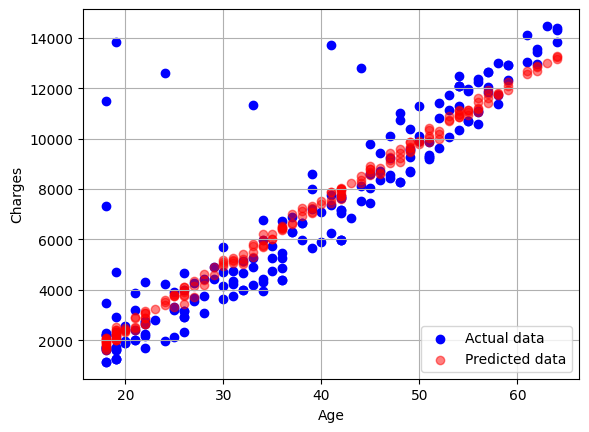

In [16]:
X = data1[['age', 'bmi']]
y = data1['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting age vs charges with predicted charges
plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 2963353.1121352375
R^2 Score: 0.7997037446535662


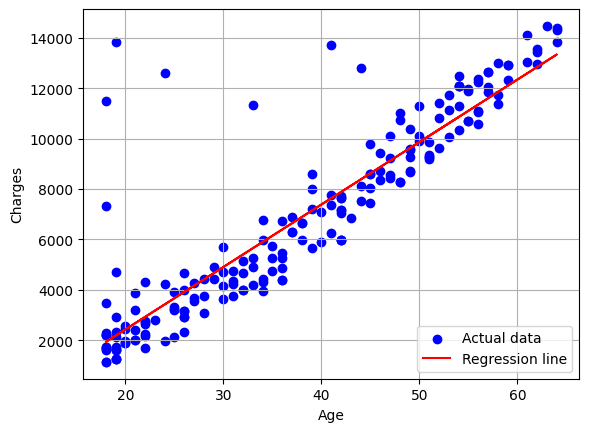

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select 'age' as the independent variable and 'charges' as the dependent variable
X = data1[['age']]
y = data1['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting age vs charges with the regression line
plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.plot(X_test['age'], y_pred, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


Model 1 (Age only) - Mean Squared Error: 2963353.1121352375
Model 1 (Age only) - R^2 Score: 0.7997037446535662

Model 1 - Testing Data (Age and Charges):
      Age  Actual Charges  Predicted Charges
1073   54     12096.65120       10856.531158
601    51      9174.13565       10112.465400
194    18      1137.46970        1927.742064
938    18      2304.00220        1927.742064
95     28      3766.88380        4407.961257
...   ...             ...                ...
835    42      7160.33030        7880.268127
614    20      1880.07000        2423.785902
457    57     11840.77505       11600.596916
1209   59     12347.17200       12096.640755
716    49      9566.99090        9616.421562

[196 rows x 3 columns]

Model 2 (Age and BMI) - Mean Squared Error: 2974740.6406598515
Model 2 (Age and BMI) - R^2 Score: 0.7989340492325951

Model 2 - Testing Data (Age, BMI, and Charges):
      Age     BMI  Actual Charges  Predicted Charges
1073   54  28.880     12096.65120       10925.439687
601    51

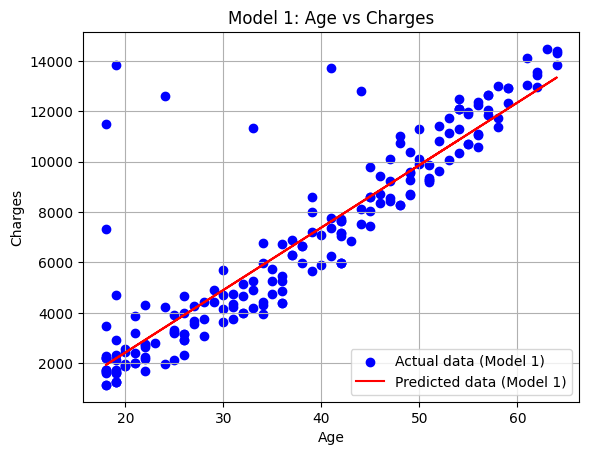

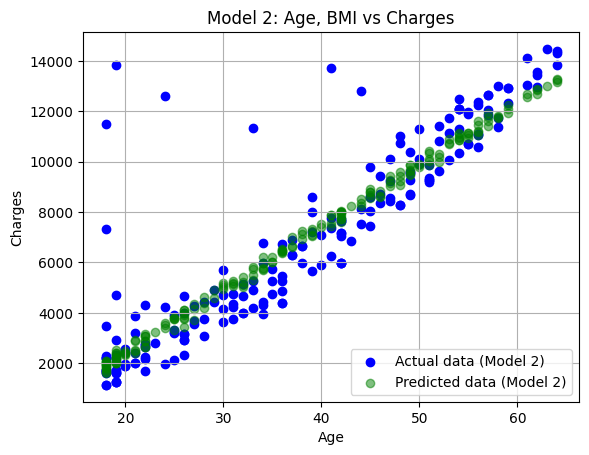

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using only age to predict charges
X1 = data1[['age']]
y = data1['charges']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

y_pred1 = model1.predict(X1_test)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f"Model 1 (Age only) - Mean Squared Error: {mse1}")
print(f"Model 1 (Age only) - R^2 Score: {r2_1}")

# Display test set and predicted values for Model 1
results_model1 = pd.DataFrame({'Age': X1_test['age'], 'Actual Charges': y_test, 'Predicted Charges': y_pred1})
print("\nModel 1 - Testing Data (Age and Charges):")
print(results_model1)

# Model 2: Using age and BMI to predict charges
X2 = data1[['age', 'bmi']]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"\nModel 2 (Age and BMI) - Mean Squared Error: {mse2}")
print(f"Model 2 (Age and BMI) - R^2 Score: {r2_2}")

# Display test set and predicted values for Model 2
results_model2 = pd.DataFrame({'Age': X2_test['age'], 'BMI': X2_test['bmi'], 'Actual Charges': y_test, 'Predicted Charges': y_pred2})
print("\nModel 2 - Testing Data (Age, BMI, and Charges):")
print(results_model2)

# Plotting Model 1: Age vs Charges
plt.scatter(X1_test, y_test, color='blue', label='Actual data (Model 1)')
plt.plot(X1_test, y_pred1, color='red', label='Predicted data (Model 1)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.title('Model 1: Age vs Charges')
plt.show()

# Plotting Model 2: Age and BMI vs Charges (only Age is shown for plotting)
plt.scatter(X2_test['age'], y_test, color='blue', label='Actual data (Model 2)')
plt.scatter(X2_test['age'], y_pred2, color='green', label='Predicted data (Model 2)', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.title('Model 2: Age, BMI vs Charges')
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using only age to predict charges
X1 = data1[['age']]
y = data1['charges']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Model 2: Using age and BMI to predict charges
X2 = data1[['age', 'bmi']]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Function to make predictions based on user input
def predict_charges(age_input, bmi_input=None):
    # Model 1: Predict using age
    age_data = pd.DataFrame({'age': [age_input]})
    predicted_charges_model1 = model1.predict(age_data)[0]
    
    print(f"Predicted Charges (Model 1 - Age only): {predicted_charges_model1}")
    
    if bmi_input is not None:
        # Model 2: Predict using age and BMI
        age_bmi_data = pd.DataFrame({'age': [age_input], 'bmi': [bmi_input]})
        predicted_charges_model2 = model2.predict(age_bmi_data)[0]
        
        print(f"Predicted Charges (Model 2 - Age and BMI): {predicted_charges_model2}")
    else:
        print("For Model 2, please provide both age and BMI.")

# Example Usage:
# Uncomment and modify the following lines to use real input values

age_input = float(input("Enter age: "))
bmi_input = float(input("Enter BMI: "))
predict_charges(age_input, bmi_input)


Enter age:  18
Enter BMI:  30.09


Predicted Charges (Model 1 - Age only): 1927.7420635930566
Predicted Charges (Model 2 - Age and BMI): 1909.1903702839177


Model 1 (Age only) - Mean Squared Error: 2963353.1121352375
Model 1 (Age only) - R^2 Score: 0.7997037446535662

Model 1 - Testing Data (Age and Charges):
      Age  Actual Charges  Predicted Charges
1073   54     12096.65120       10856.531158
601    51      9174.13565       10112.465400
194    18      1137.46970        1927.742064
938    18      2304.00220        1927.742064
95     28      3766.88380        4407.961257
...   ...             ...                ...
835    42      7160.33030        7880.268127
614    20      1880.07000        2423.785902
457    57     11840.77505       11600.596916
1209   59     12347.17200       12096.640755
716    49      9566.99090        9616.421562

[196 rows x 3 columns]

Model 2 (Age and BMI) - Mean Squared Error: 2974740.6406598515
Model 2 (Age and BMI) - R^2 Score: 0.7989340492325951

Model 2 - Testing Data (Age, BMI, and Charges):
      Age     BMI  Actual Charges  Predicted Charges
1073   54  28.880     12096.65120       10925.439687
601    51

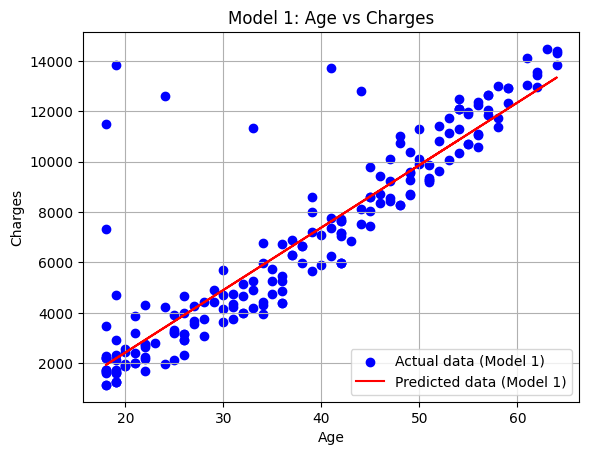

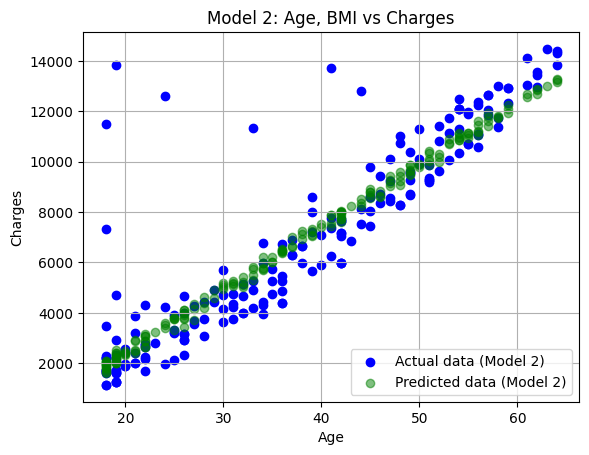

Enter age:  18
Enter BMI (optional for Model 1):  30


Predicted Charges (Model 1 - Age only): 1927.7420635930566
Predicted Charges (Model 2 - Age and BMI): 1911.6543539713607


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using only age to predict charges
X1 = data1[['age']]
y = data1['charges']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

y_pred1 = model1.predict(X1_test)

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f"Model 1 (Age only) - Mean Squared Error: {mse1}")
print(f"Model 1 (Age only) - R^2 Score: {r2_1}")

# Display test set and predicted values for Model 1
results_model1 = pd.DataFrame({'Age': X1_test['age'], 'Actual Charges': y_test, 'Predicted Charges': y_pred1})
print("\nModel 1 - Testing Data (Age and Charges):")
print(results_model1)

# Model 2: Using age and BMI to predict charges
X2 = data1[['age', 'bmi']]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"\nModel 2 (Age and BMI) - Mean Squared Error: {mse2}")
print(f"Model 2 (Age and BMI) - R^2 Score: {r2_2}")

# Display test set and predicted values for Model 2
results_model2 = pd.DataFrame({'Age': X2_test['age'], 'BMI': X2_test['bmi'], 'Actual Charges': y_test, 'Predicted Charges': y_pred2})
print("\nModel 2 - Testing Data (Age, BMI, and Charges):")
print(results_model2)

# Plotting Model 1: Age vs Charges
plt.scatter(X1_test, y_test, color='blue', label='Actual data (Model 1)')
plt.plot(X1_test, y_pred1, color='red', label='Predicted data (Model 1)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.title('Model 1: Age vs Charges')
plt.show()

# Plotting Model 2: Age and BMI vs Charges (only Age is shown for plotting)
plt.scatter(X2_test['age'], y_test, color='blue', label='Actual data (Model 2)')
plt.scatter(X2_test['age'], y_pred2, color='green', label='Predicted data (Model 2)', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.title('Model 2: Age, BMI vs Charges')
plt.show()

# Function to make predictions based on user input
def predict_charges(age_input, bmi_input=None):
    # Model 1: Predict using age
    age_data = pd.DataFrame({'age': [age_input]})
    predicted_charges_model1 = model1.predict(age_data)[0]
    
    print(f"Predicted Charges (Model 1 - Age only): {predicted_charges_model1}")
    
    if bmi_input is not None:
        # Model 2: Predict using age and BMI
        age_bmi_data = pd.DataFrame({'age': [age_input], 'bmi': [bmi_input]})
        predicted_charges_model2 = model2.predict(age_bmi_data)[0]
        
        print(f"Predicted Charges (Model 2 - Age and BMI): {predicted_charges_model2}")
    else:
        print("For Model 2, please provide both age and BMI.")

# Example Usage:
# Uncomment and modify the following lines to use real input values

age_input = float(input("Enter age: "))
bmi_input = float(input("Enter BMI (optional for Model 1): "))
predict_charges(age_input, bmi_input)


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using only age to predict charges
X1 = data1[['age']]
y = data1['charges']

# Model 2: Using age and BMI to predict charges
X2 = data1[['age', 'bmi']]

# Initialize linear regression model
model1 = LinearRegression()
model2 = LinearRegression()

# Perform K-Fold Cross-Validation for Model 1 (Age Only)
k = 3  # Set the number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores_model1 = cross_val_score(model1, X1, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_model1 = cross_val_score(model1, X1, y, cv=kf, scoring='r2')

print(f"Model 1 (Age only) - Mean Squared Error (5-Fold CV): {-np.mean(mse_scores_model1)}")
print(f"Model 1 (Age only) - R^2 Score (5-Fold CV): {np.mean(r2_scores_model1)}")

# Perform K-Fold Cross-Validation for Model 2 (Age and BMI)
mse_scores_model2 = cross_val_score(model2, X2, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_model2 = cross_val_score(model2, X2, y, cv=kf, scoring='r2')

print(f"\nModel 2 (Age and BMI) - Mean Squared Error (5-Fold CV): {-np.mean(mse_scores_model2)}")
print(f"Model 2 (Age and BMI) - R^2 Score (5-Fold CV): {np.mean(r2_scores_model2)}")

# Function to make predictions based on user input
def predict_charges(age_input, bmi_input=None):
    # Model 1: Predict using age
    age_data = pd.DataFrame({'age': [age_input]})
    predicted_charges_model1 = model1.fit(X1, y).predict(age_data)[0]
    
    print(f"\nPredicted Charges (Model 1 - Age only): {predicted_charges_model1}")
    
    if bmi_input is not None:
        # Model 2: Predict using age and BMI
        age_bmi_data = pd.DataFrame({'age': [age_input], 'bmi': [bmi_input]})
        predicted_charges_model2 = model2.fit(X2, y).predict(age_bmi_data)[0]
        
        print(f"Predicted Charges (Model 2 - Age and BMI): {predicted_charges_model2}")
    else:
        print("For Model 2, please provide both age and BMI.")

# Example Usage:
# Uncomment and modify the following lines to use real input values

# age_input = float(input("Enter age: "))
# bmi_input = float(input("Enter BMI (optional for Model 1): "))
# predict_charges(age_input, bmi_input)


Model 1 (Age only) - Mean Squared Error (5-Fold CV): 2946036.1329639754
Model 1 (Age only) - R^2 Score (5-Fold CV): 0.8023571039339682

Model 2 (Age and BMI) - Mean Squared Error (5-Fold CV): 2933621.7166868877
Model 2 (Age and BMI) - R^2 Score (5-Fold CV): 0.8031741280259711
